# Lab 1


### El Niño Paper

The paper discussed in this lab is titled "Time-Series Study of Associations between Rates of People Affected by Disasters and the El Niño Southern Oscillation (ENSO) Cycle." The paper was written by Lam et al. and was published in 2019. It can be found at https://www.mdpi.com/1660-4601/16/17/3146. 


#### Objective

The objective of this paper was to analyze rates of people affected by natural disasters (PAD) at three different levels (global, regional, and national) to see if these numbers have any link to El Niño Southern Oscilation (ENSO).



#### Methods

The researchers found PAD rates by combining records from the EM-DAT database with UN population data to find percentages of people affected at given levels. ENSO data was taken from two indices, the ONI and MEI. The PAD and ENSO numbers were compared in a time series regression.



#### Results

The researchers found a positive relationship between El Niño years and PAD resulting from droughts on a global leve, while El Niño was most colosely associated with flood-related PAD on a regional level, especially in South Asia.

### The Data

#### ONI Data

In [6]:
oni.url <- "https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt"
oni.name <- tail(unlist(strsplit(oni.url, "/")), n=1)
oni.file <- paste("/tmp/", oni.name, sep="")
download.file(oni.url, oni.file, method = 'auto')

In [ ]:
oni.df <- read.table(oni.file, header = TRUE)
oni.df

In [ ]:
oni.ts <- ts(oni.df$ANOM, start = c(1950, 1), frequency = 12) 
oni.ts

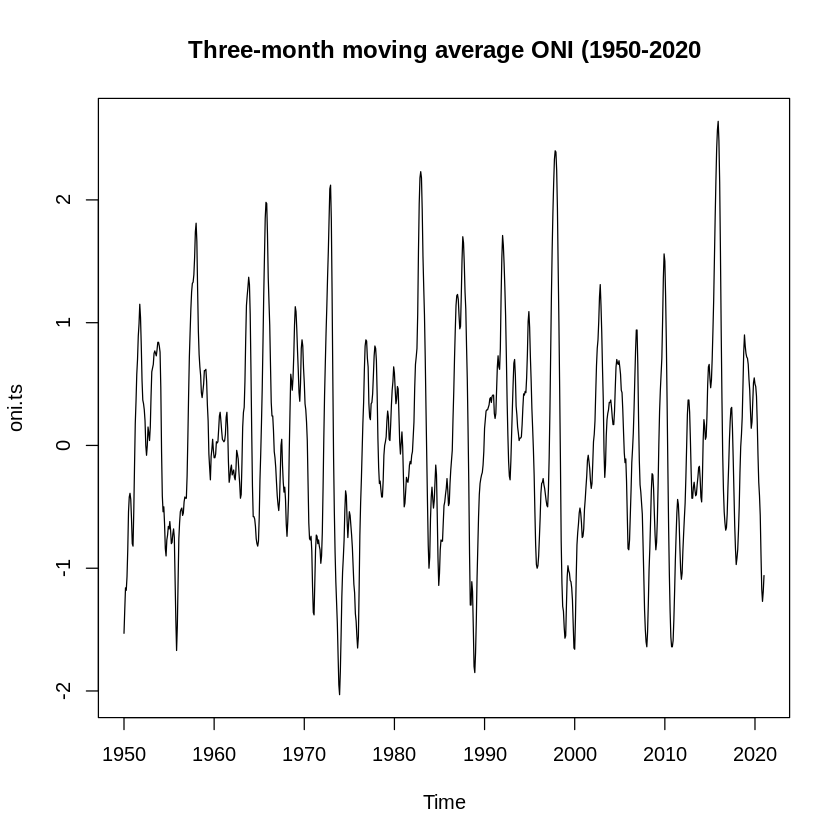

In [11]:
plot(oni.ts, main="Three-month moving average ONI (1950-2020")

#### MEI Data

In [13]:
mei.url <- "https://psl.noaa.gov/enso/mei.old/table.html"
mei.name <- tail(unlist(strsplit(mei.url, "/")), n=1)
mei.file <- paste("/tmp/", mei.name, sep="")
download.file(mei.url, mei.file, method = 'auto')

In [14]:
a <- readLines(mei.file)
for (my.line in a){
  a <- grep("^YEAR.*", my.line)
  if (length(a) > 0) {
    my.cols <- unlist(strsplit(my.line, "\\s+"))
  }
}

In [15]:
n.cols <- length(my.cols)
mei.df <- data.frame(matrix(ncol = n.cols, nrow = 0))
colnames(mei.df) <- my.cols 
str(mei.df)

'data.frame':	0 obs. of  13 variables:
 $ YEAR  : logi 
 $ DECJAN: logi 
 $ JANFEB: logi 
 $ FEBMAR: logi 
 $ MARAPR: logi 
 $ APRMAY: logi 
 $ MAYJUN: logi 
 $ JUNJUL: logi 
 $ JULAUG: logi 
 $ AUGSEP: logi 
 $ SEPOCT: logi 
 $ OCTNOV: logi 
 $ NOVDEC: logi 


In [16]:
a <- readLines(mei.file)
for (my.line in a){
  a <- grep("^[0-9].*", my.line)
  if (length(a) > 0) {
    my.data <- unlist(strsplit(my.line, "\\s+"))
    num.data <- length(my.data)
    if (num.data == n.cols) {
      my.values <- c()
      for (d in my.data) {
        my.values <- append(my.values, as.numeric(d))
      }
      mei.df[nrow(mei.df)+1,] = my.values
    }
  }
}

In [17]:
mei.df[1:10, 2:n.cols]

,DECJAN,JANFEB,FEBMAR,MARAPR,APRMAY,MAYJUN,JUNJUL,JULAUG,AUGSEP,SEPOCT,OCTNOV,NOVDEC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.030,-1.133,-1.283,-1.071,-1.434,-1.412,-1.269,-1.042,-0.631,-0.441,-1.151,-1.235
2,-1.049,-1.152,-1.178,-0.511,-0.374,0.288,0.679,0.818,0.726,0.720,0.694,0.504
3,0.433,0.138,0.071,0.224,-0.307,-0.756,-0.305,-0.374,0.310,0.265,-0.351,-0.098
4,0.044,0.401,0.277,0.687,0.756,0.191,0.382,0.209,0.483,0.087,0.078,0.351
5,-0.036,-0.027,0.154,-0.616,-1.465,-1.558,-1.355,-1.456,-1.159,-1.335,-1.124,-1.088
6,-0.740,-0.669,-1.117,-1.621,-1.653,-2.247,-1.976,-2.050,-1.829,-1.738,-1.821,-1.846
7,-1.408,-1.275,-1.371,-1.216,-1.304,-1.523,-1.244,-1.118,-1.350,-1.478,-1.024,-0.993
8,-0.915,-0.348,0.108,0.383,0.813,0.730,0.926,1.132,1.117,1.068,1.138,1.268
9,1.473,1.454,1.313,0.991,0.673,0.812,0.700,0.421,0.171,0.203,0.476,0.691


In [18]:
as.vector(t(mei.df[1:10, 2:n.cols]))

[1] -1.030 -1.133 -1.283 -1.071 -1.434 -1.412 -1.269 -1.042 -0.631 -0.441
 [11] -1.151 -1.235 -1.049 -1.152 -1.178 -0.511 -0.374  0.288  0.679  0.818
 [21]  0.726  0.720  0.694  0.504  0.433  0.138  0.071  0.224 -0.307 -0.756
 [31] -0.305 -0.374  0.310  0.265 -0.351 -0.098  0.044  0.401  0.277  0.687
 [41]  0.756  0.191  0.382  0.209  0.483  0.087  0.078  0.351 -0.036 -0.027
 [51]  0.154 -0.616 -1.465 -1.558 -1.355 -1.456 -1.159 -1.335 -1.124 -1.088
 [61] -0.740 -0.669 -1.117 -1.621 -1.653 -2.247 -1.976 -2.050 -1.829 -1.738
 [71] -1.821 -1.846 -1.408 -1.275 -1.371 -1.216 -1.304 -1.523 -1.244 -1.118
 [81] -1.350 -1.478 -1.024 -0.993 -0.915 -0.348  0.108  0.383  0.813  0.730
 [91]  0.926  1.132  1.117  1.068  1.138  1.268  1.473  1.454  1.313  0.991
[101]  0.673  0.812  0.700  0.421  0.171  0.203  0.476  0.691  0.553  0.810
[111]  0.502  0.202 -0.025 -0.062 -0.112  0.111  0.092 -0.071 -0.170 -0.247

In [19]:
mei.ts <- ts(as.vector(t(mei.df[,2:length(my.cols)])), start = c(1950, 1), frequency = 12)

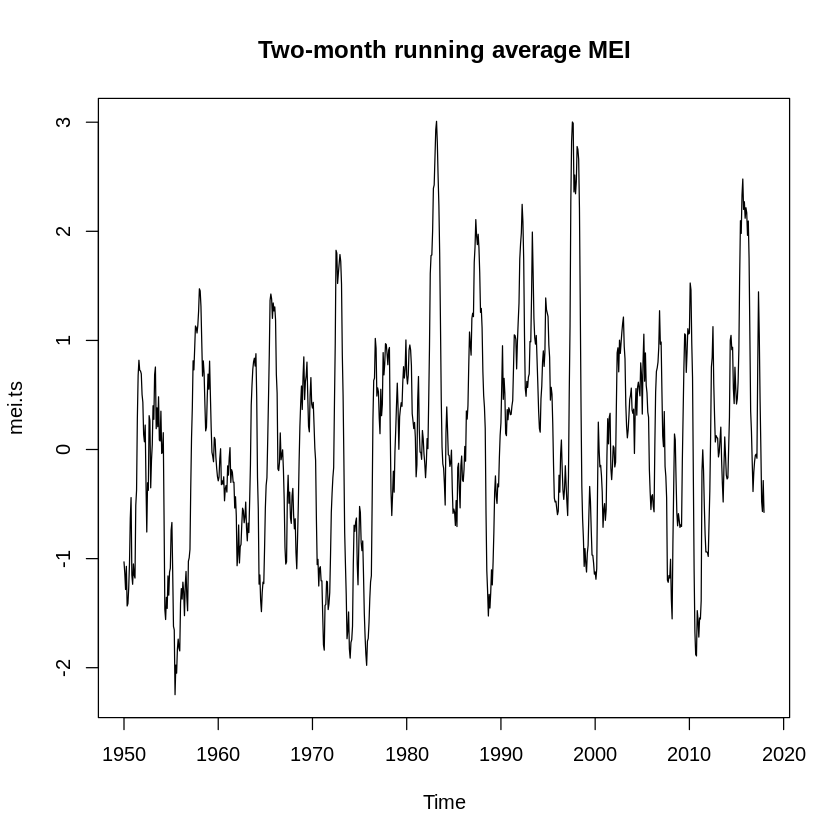

In [67]:
plot(mei.ts, main = "Two-month running average MEI")

#### PAD Data

In [23]:
pad.file <- "/tmp/emdat_public.csv"
pad.df.all <- read.csv(pad.file, header=TRUE, skip=6)

In [24]:
colnames(pad.df.all)

[1] "Dis.No"                          "Year"                           
 [3] "Seq"                             "Disaster.Group"                 
 [5] "Disaster.Subgroup"               "Disaster.Type"                  
 [7] "Disaster.Subtype"                "Disaster.Subsubtype"            
 [9] "Event.Name"                      "Entry.Criteria"                 
[11] "Country"                         "ISO"                            
[13] "Region"                          "Continent"                      
[15] "Location"                        "Origin"                         
[17] "Associated.Dis"                  "Associated.Dis2"                
[19] "OFDA.Response"                   "Appeal"                         
[21] "Declaration"                     "Aid.Contribution"               
[23] "Dis.Mag.Value"                   "Dis.Mag.Scale"                  
[25] "Latitude"                        "Longitude"                      
[27] "Local.Time"                      "River.Basin"                    
[29] "Start.Year"                      "Start.Month"                    
[31] "Start.Day"                       "End.Year"                       
[33] "End.Month"                       "End.Day"                        
[35] "Total.Deaths"                    "No.Injured"                     
[37] "No.Affected"                     "No.Homeless"                    
[39] "Total.Affected"                  "Reconstruction.Costs...000.US.."
[41] "Insured.Damages...000.US.."      "Total.Damages...000.US.."       
[43] "CPI"

In [25]:
cols.interest <- c("Country", "ISO", "Start.Year", "Start.Month", 
                   "End.Year", "End.Month", "Total.Deaths", "Declaration", 
                   "OFDA.Response", "Total.Affected")
pad.df <- pad.df.all[cols.interest]

In [26]:
wbank.url <- "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
wbank.name <- "world_bank.zip"
wbank.file <- paste("/tmp/", wbank.name, sep="")
download.file(wbank.url, wbank.file)

In [27]:
unzip(zipfile = wbank.file, exdir = "/tmp")

In [28]:
my.file <- ""
for (tmp.file in list.files("/tmp")){
  a <- grep("^API_SP.POP.TOTL.*csv", tmp.file)
  if (length(a) > 0) {
    my.file <- tmp.file
  }
}
print(my.file)

[1] "API_SP.POP.TOTL_DS2_en_csv_v2_2106202.csv"


In [29]:
wb.file <- paste("/tmp/", my.file, sep="")

In [ ]:
wb.df <- read.csv(wb.file, header = TRUE, skip = 4)
wb.df

In [ ]:
for (i in 1:nrow(pad.df)) {
  tmp.iso <- pad.df[i, ][['ISO']]
  tmp.year <- pad.df[i, ][['Start.Year']]
  tmp.col <- paste("X", tmp.year, sep="")
  a <- match(tmp.iso, wb.df$Country.Code)
  if (!is.na(a)) {
    tmp.pop <- wb.df[,tmp.col][a]
    pad.df[i, 'POP'] = tmp.pop
    #print(c(tmp.iso, tmp.year, tmp.pop))
  } else {
    pad.df[i, 'POP'] = NA
    print(paste("Could not match", tmp.iso))
  }
}

In [52]:
YEAR <- 1964

my.yr.pad <- subset(pad.df, Start.Year == YEAR)
pad.yr <- 0
for (i in 1:nrow(my.yr.pad)){
  if (!is.na(my.yr.pad$Total.Affected[i]) & !is.na(my.yr.pad$POP[i])) {
    my.ta <- my.yr.pad$Total.Affected[i]
    pad.yr <- pad.yr + my.ta
  }
}
cat("The total number of PAD in", YEAR, "was", pad.yr, "\n")

pop.yr <- 0
for (my.iso in unique(my.yr.pad$ISO)){
  #print(my.iso)
  a <- match(my.iso, my.yr.pad$ISO)
  tmp.pop <- my.yr.pad$POP[a]
  if (!is.na(tmp.pop)) {
    pop.yr <- pop.yr + tmp.pop
  }
}
cat("The world population in", YEAR, "was", pop.yr, "\n")

pad.rt <- pad.yr/pop.yr*1000
cat("The rate of PAD in", YEAR, "was", pad.rt)

The total number of PAD in 1964 was 7533564 
The world population in 1964 was 1923849549 
The rate of PAD in 1964 was 3.91588

In [54]:
pad.rate <- function(year) {

  my.yr.pad <- subset(pad.df, Start.Year == year)
  pad.yr <- 0
  for (i in 1:nrow(my.yr.pad)){
    if (!is.na(my.yr.pad$Total.Affected[i]) & !is.na(my.yr.pad$POP[i])) {
      my.ta <- my.yr.pad$Total.Affected[i]
      pad.yr <- pad.yr + my.ta
    }
  }

  pop.yr <- 0
  for (my.iso in unique(my.yr.pad$ISO)){
    #print(my.iso)
    a <- match(my.iso, my.yr.pad$ISO)
    tmp.pop <- my.yr.pad$POP[a]
    if (!is.na(tmp.pop)) {
      pop.yr <- pop.yr + tmp.pop
    }
  }

  pad.rt <- pad.yr/pop.yr*1000
  return(pad.rt)
}

In [58]:
year.list <- c(1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,
               1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
               2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017)

In [63]:
x <- vector(type = "list", length = length(year.list))
for (i in length(year.list)) {
  pad.plt <- pad.rate(i)
  x[i] <- pad.plt
}
plot(x,year.list)

ERROR: ignored

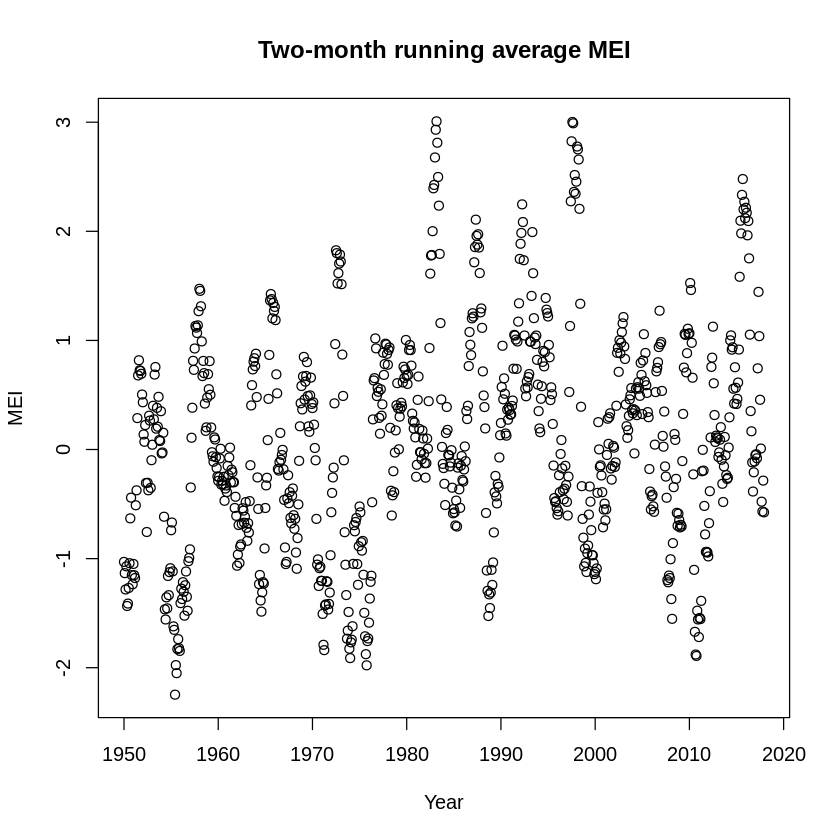

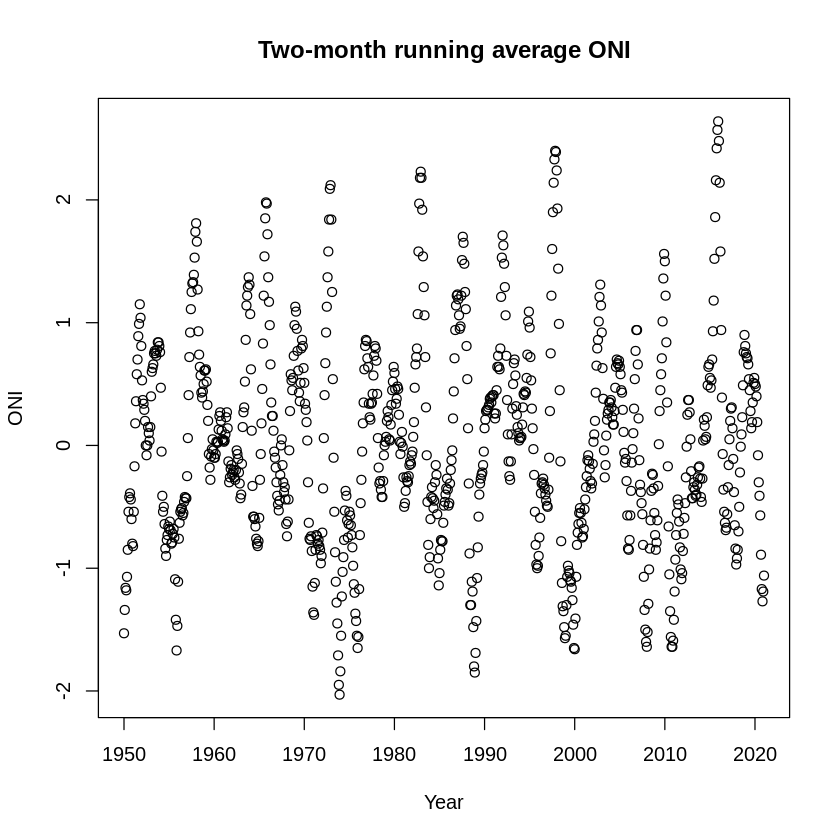

In [72]:
plot(mei.ts, 
     main = "Two-month running average MEI", 
     xlab = "Year", 
     ylab = "MEI",
     type = "o",
     lty = 0)

plot(oni.ts, 
     main = "Two-month running average ONI", 
     xlab = "Year", 
     ylab = "ONI",
     type = "o",
     lty = 0)

### Discussion

#### El Niño Years

According to the paper, "an El Niño (or La Niña) event occurs when the ONI is higher (lower) than 0.5 °C (−0.5 °C) for at least five consecutive overlapping three-month periods during July-June." According to this definition, El Niño years in the range of 1964 to 2017 include (roughly): 1964-66; 1968-69; 1971-74; 1976-78; 1980; 1983-85; 1987-89; 1992; 1995-96; 1998-2001; 2003; 1995-2012; and 2015-16.

#### Another El Niño-esque Dataset

A dataset that I believe would show similar patterns to El Niño is U.S. presidential campaign spending, as it cycles between years just like El Niño. Unfortunately, the dataset I found was not cooperative with Google Colab.

### Conclusions

I will be honest and say that I struggled with this lab. I feel as though I do not have a very firm grasp over R yet, which made it difficult to come up with ways of going about the assignments. Much of the code for reading in the data is copied from the code snippet distributed to the class, though I did turn the PAD data into a function for ease of use; unfortunately, the method I came up with for plotting PAD data did not work as I had hoped (as seen above). I was therefore unable to find a way to plot the PAD data, though I did plot the ONI and MEI data to the best of my ability (I did not include a legend because I did not think it added anything to the plot). I did see the clear patterns in the ONI and MEI data as El Niño cycles from year to year. I think before the next lab I should spend time becoming more familiar with R so that I do not run into these problems again.